In [1]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from moses.utils import get_mol

In [89]:
plots_path = Path("/Users/Munchic/Developer/Capstone/tinymolecule/data/plots")

logs_ccr5 = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_valid_45e/logs/summary.csv")
logs_train = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/ccr5_train/logs/summary.csv")

logs_train.head()  # preview


,Unnamed: 0,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,...,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10,uuid
0,0,-8.8,-8.6,-8.4,-8.4,-8.4,-8.2,-8.1,-8.0,-8.0,...,6.935,2.271,9.801,10.692,9.970,9.296,3.832,10.212,10.179,9d6d0657
1,1,-11.6,-10.4,-10.0,-10.0,-9.8,-9.5,-9.4,-9.3,-9.3,...,7.240,7.250,6.630,7.143,8.215,8.915,7.886,7.888,7.538,e09444a9
2,2,-10.4,-10.3,-10.1,-10.1,-10.1,-9.9,-9.9,-9.7,-9.7,...,3.781,3.790,3.979,3.945,5.237,4.956,9.647,7.843,4.935,804e6588
3,3,-10.7,-10.5,-10.1,-10.1,-9.9,-9.6,-9.6,-9.5,-9.3,...,6.221,3.834,3.909,2.255,4.279,4.262,3.682,6.220,2.578,1879ab89
4,4,-9.8,-9.2,-9.1,-9.0,-9.0,-8.9,-8.9,-8.7,-8.5,...,5.619,8.688,8.167,5.270,8.705,8.466,9.253,8.039,4.977,9130b1c9


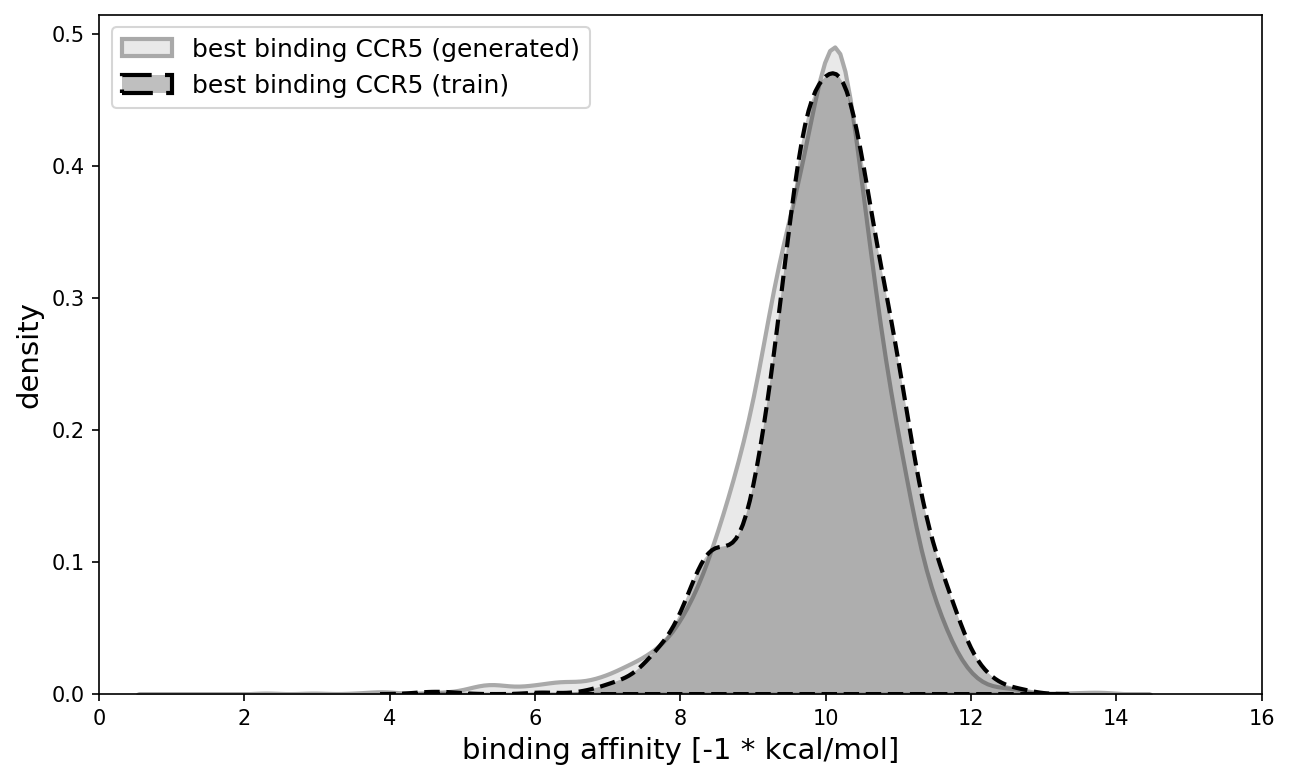

In [90]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=logs_ccr5["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 (generated)", fill=True, color="darkgrey")
sns.kdeplot(data=logs_train["affin_kcal_mol-1_1"] * (-1), linewidth=2, label="best binding CCR5 (train)", fill=True, color="black", linestyle="--")

plt.xlim(0, 16)
plt.xlabel(f"binding affinity [-1 * kcal/mol]", size=14)
plt.ylabel("density", size=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

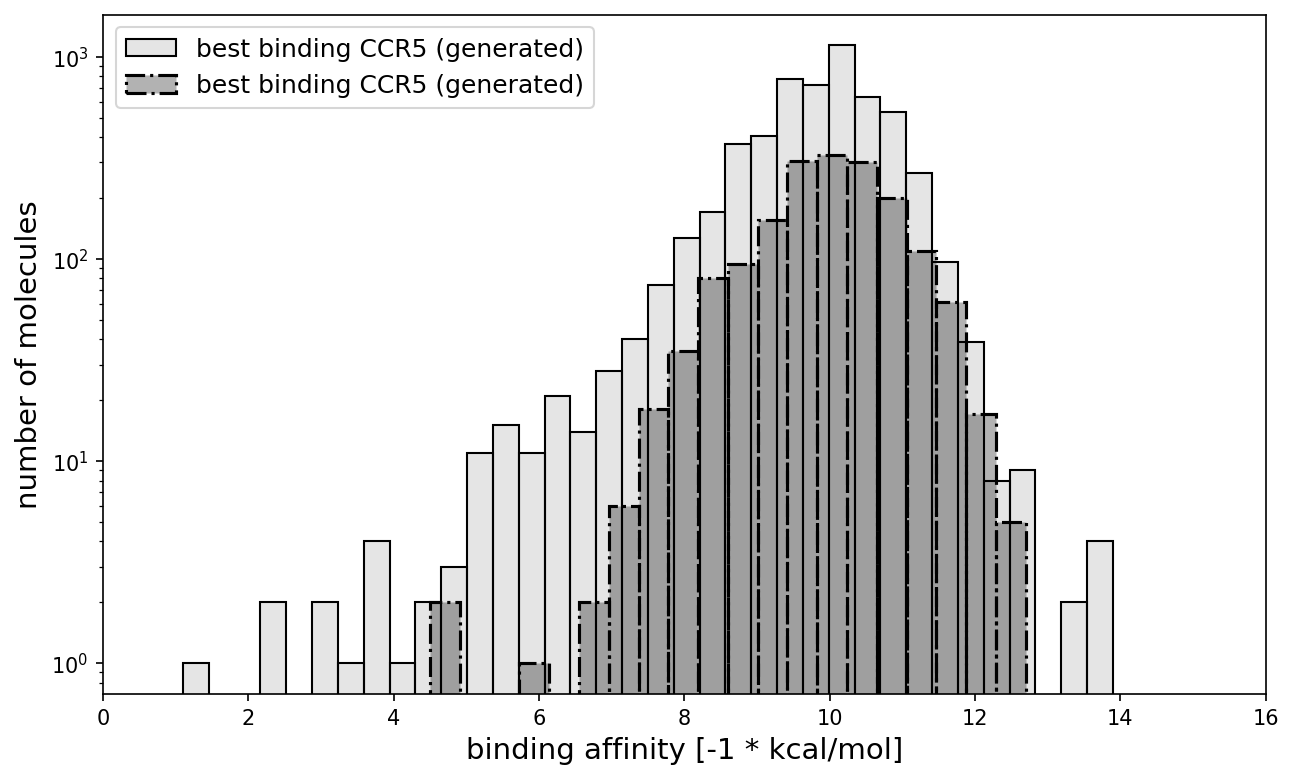

In [92]:
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(logs_ccr5["affin_kcal_mol-1_1"] * (-1), label="best binding CCR5 (generated)", color="darkgrey", alpha=0.3, bins=36)
sns.histplot(logs_train["affin_kcal_mol-1_1"] * (-1), label="best binding CCR5 (generated)", color="black", linestyle="-.", alpha=0.3, bins=20, linewidth=1.5)

plt.xlim(0, 16)
plt.yscale("log")
plt.ylabel("number of molecules", size=14)
plt.xlabel(f"binding affinity [-1 * kcal/mol]", size=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [55]:
ccr5_mean = np.mean(logs_ccr5["affin_kcal_mol-1_1"] * (-1))
ccr5_sigma = np.std(logs_ccr5["affin_kcal_mol-1_1"] * (-1))
print("std:", ccr5_sigma)
print("95% conf int:", stats.norm.interval(0.95, loc=ccr5_mean, scale=ccr5_sigma))
print("max:", np.max(logs_ccr5["affin_kcal_mol-1_1"] * (-1)))

std: 1.0590347581923878
95% conf int: (7.721888785910416, 11.873228754776747)
max: 13.9


In [56]:
train_mean = np.mean(logs_train["affin_kcal_mol-1_1"] * (-1))
train_sigma = np.std(logs_train["affin_kcal_mol-1_1"] * (-1))
print("std:", train_sigma)
print("95% conf int:", stats.norm.interval(0.95, loc=train_mean, scale=train_sigma))

std: 0.9373645187845855
95% conf int: (8.157508605122075, 11.831909999529088)


## Average best binding affinity

In [57]:
all_baff_ccr5 = pd.concat([logs_ccr5[f"affin_kcal_mol-1_{i}"] for i in range(1, 11)], axis=1)
ccr5_affin_mean = all_baff_ccr5.mean(axis=1) * (-1)

all_baff_train = pd.concat([logs_train[f"affin_kcal_mol-1_{i}"] for i in range(1, 11)], axis=1)
train_affin_mean = all_baff_train.mean(axis=1) * (-1)

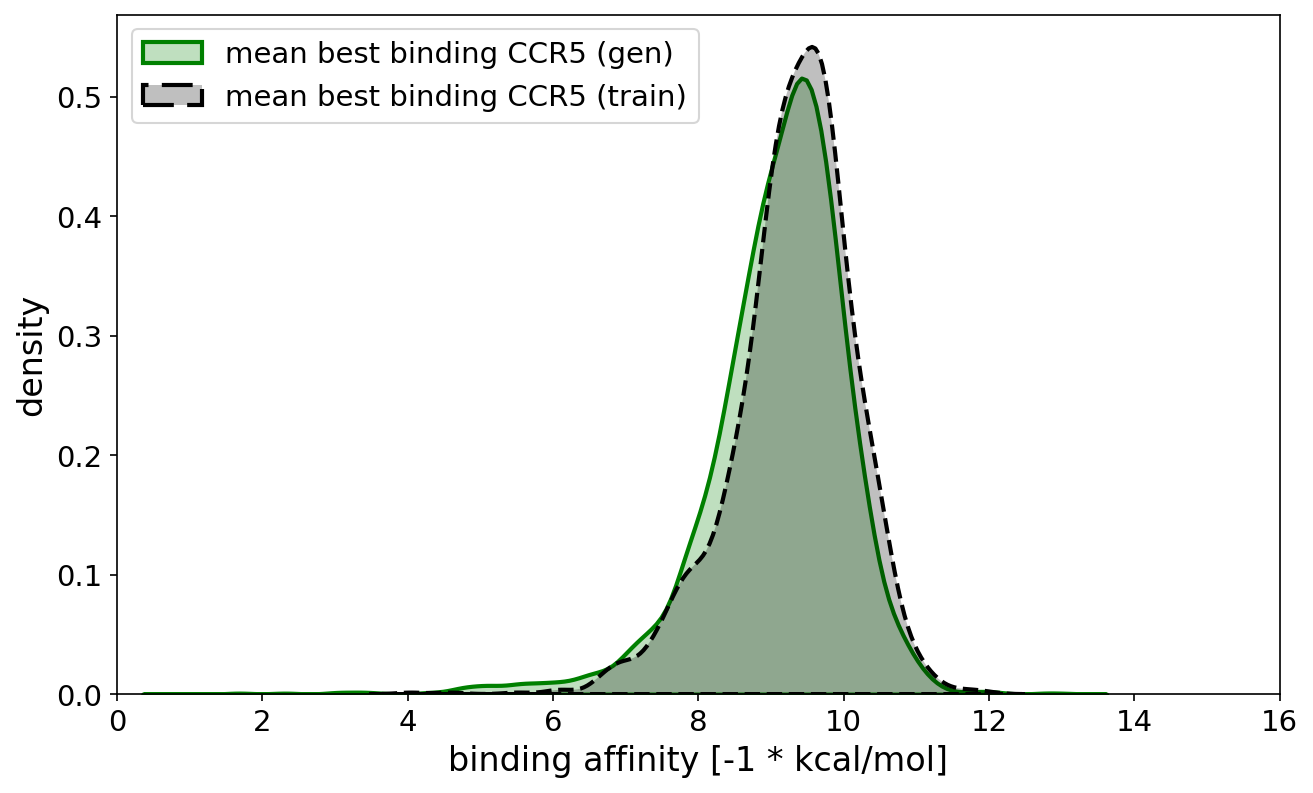

In [127]:
plt.figure(figsize=(10, 6), dpi=150)

sns.kdeplot(data=ccr5_affin_mean, linewidth=2, label="mean best binding CCR5 (gen)", fill=True, color="green")
sns.kdeplot(data=train_affin_mean, linewidth=2, label="mean best binding CCR5 (train)", fill=True, color="black", linestyle="--")

plt.xlim(0, 16)
plt.xlabel(f"binding affinity [-1 * kcal/mol]", size=16)
plt.ylabel("density", size=16)
plt.legend(loc="upper left", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(plots_path / "baff-gen-vs-train-mean.png")
plt.show()

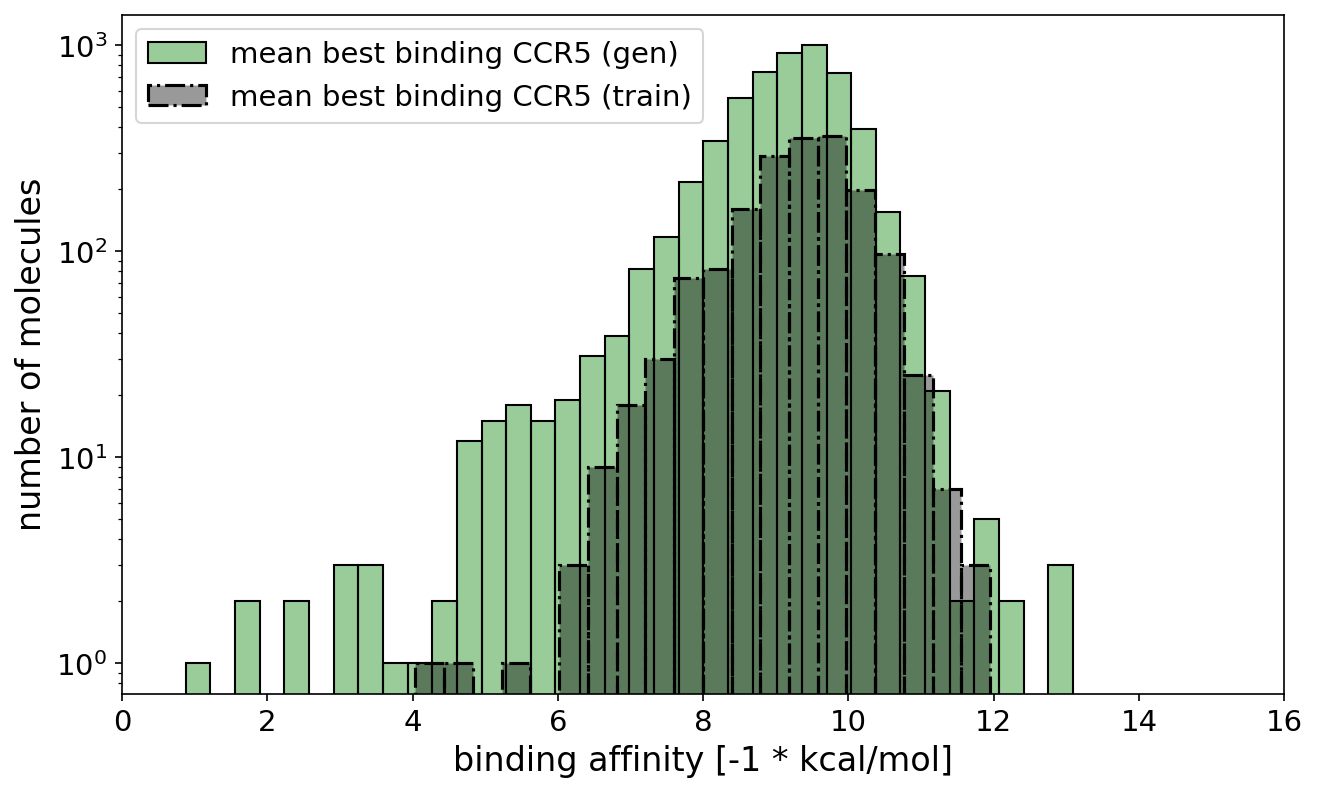

In [128]:
plt.figure(figsize=(10, 6), dpi=150)

sns.histplot(ccr5_affin_mean, label="mean best binding CCR5 (gen)", color="green", alpha=0.4, bins=36)
sns.histplot(train_affin_mean, label="mean best binding CCR5 (train)", color="black", linestyle="-.", alpha=0.4, bins=20, linewidth=1.5)

plt.xlim(0, 16)
plt.yscale("log")
plt.ylabel("number of molecules", size=16)
plt.xlabel(f"binding affinity [-1 * kcal/mol]", size=16)
plt.legend(loc="upper left", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(plots_path / "baff-gen-vs-train-log-mean.png")
plt.show()

In [72]:
ccr5_mean = np.mean(ccr5_affin_mean)
ccr5_sigma = np.std(ccr5_affin_mean)
print("mean:", ccr5_mean)
print("std:", ccr5_sigma)
print("95% conf int:", stats.norm.interval(0.95, loc=ccr5_mean, scale=ccr5_sigma))
print("max:", np.max(ccr5_affin_mean))

mean: 9.091911191480811
std: 0.9844364077587218
95% conf int: (7.16245128720373, 11.021371095757893)
max: 13.089999999999998


In [73]:
train_mean = np.mean(train_affin_mean)
train_sigma = np.std(train_affin_mean)
print("mean:", train_mean)
print("std:", train_sigma)
print("95% conf int:", stats.norm.interval(0.95, loc=train_mean, scale=train_sigma))
print("max:", np.max(train_affin_mean))

mean: 9.29964534883721
std: 0.844028505684849
95% conf int: (7.645379875769746, 10.953910821904675)
max: 11.95


In [78]:
id_high = logs_ccr5[logs_ccr5["affin_kcal_mol-1_1"] == -13.9]["uuid"].values[0]
samples = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule/data/gen/ccr5_valid_45e.csv")

In [79]:
smi = samples[samples["uuid"] == id_high]["SMILES"].values[0]

In [80]:
a = get_mol(smi)

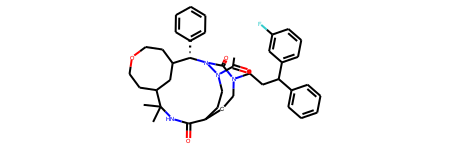

In [88]:
a

In [83]:
from rdkit.Chem import Draw

In [85]:
Draw.MolToFile(a, "/Users/Munchic/Developer/Capstone/tinymolecule/data/plots/test.png")   